# Baseline Classification Model: Random Forest on Individual Data

This file is composed of a random forest classification model to evaluate a general accuracy level of traditional ML methods in classifying our HAR data based on activity. 

__INPUT: .csv files containing the individual sensor data (plain_data.csv)__

__OUTPUT: Random Forest Multi-Classification Model (F1 Score=)__

## Imports

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

## Read in Data

In [4]:
df = pd.read_csv("../../10_code/40_usable_data_for_models/41_Duke_Data/plain_data.csv")

In [3]:
df.sample(5)

,ACC1,ACC2,ACC3,TEMP,EDA,BVP,HR,Magnitude,Activity,Subject_ID,Round
28654,37.076923,20.326923,42.192308,35.05,0.618921,26.18,80.600,59.733348,DB,19-006,2
262870,58.166667,21.666667,31.333333,31.85,2.273628,211.67,101.365,69.531168,Baseline,19-053,2
163362,2.555556,21.111111,58.888889,32.83,1.565667,-194.44,66.080,62.610791,Type,19-033,1
225465,22.000000,84.395349,31.581395,34.39,0.256143,6.19,74.065,92.757530,Activity,19-045,2
70423,48.857143,12.142857,32.714286,32.39,0.130633,8.52,81.570,60.039103,Baseline,19-014,2


In [6]:
df.shape

(279840, 11)

## Initial RF Model

In [7]:
rands = np.random.choice(df.Subject_ID.unique(),11, replace=False)
print(rands)

['19-051' '19-049' '19-029' '19-019' '19-001' '19-040' '19-050' '19-039'
 '19-015' '19-035' '19-046']


### Split Subjects into Test and Train Sets (n=44,11)

In [8]:
test = df[df['Subject_ID'].isin(rands)] 
train = df[-df['Subject_ID'].isin(rands)]

### Feature Selection

In [9]:
train = train[['ACC1', 'ACC2', 'ACC3', 'TEMP', 'EDA', 'EDA', 'BVP', 'HR', 'Magnitude','Activity']]
test = test[['ACC1', 'ACC2', 'ACC3', 'TEMP', 'EDA', 'EDA', 'BVP', 'HR', 'Magnitude','Activity']]

### Test-train Split

In [10]:
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

### Standardize Data

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest Classifier Initialization

### Fit and Predict using RF model

In [13]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### Evaluate Feature Importances

In [17]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(str(f+1)+ ". "+train.columns[f] + " (Importance: " + str(importances[indices[f]])+")")



Feature ranking:
1. ACC1 (Importance: 0.3093791072371883)
2. ACC2 (Importance: 0.13685078036035261)
3. ACC3 (Importance: 0.11561112301741275)
4. TEMP (Importance: 0.11264948086446122)
5. EDA (Importance: 0.10453248224902152)
6. EDA (Importance: 0.08130587137976358)
7. BVP (Importance: 0.078218035769865)
8. HR (Importance: 0.050909163787750414)
9. Magnitude (Importance: 0.010543955334184578)


### Confusion Matrix

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Confusion matrix, without normalization
[[22491  3512   206   191]
 [ 9116  8793  1171  2040]
 [ 2454  1770   796   260]
 [ 1533  2358    42  1347]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Normalized confusion matrix
[[0.85 0.13 0.01 0.01]
 [0.43 0.42 0.06 0.1 ]
 [0.46 0.34 0.15 0.05]
 [0.29 0.45 0.01 0.26]]


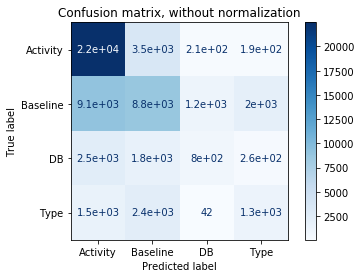

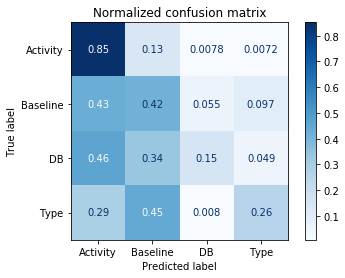

In [14]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

### Evaluate Accuracy & F1 Score

In [15]:
scores = pd.DataFrame([accuracy_score(y_test, y_pred),f1_score(y_test, y_pred,average='weighted')], columns = ['Score'], index = ['Accuracy', 'F1'])

In [16]:
scores

,Score
Accuracy,0.575534
F1,0.546272
